In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [46]:
data = pd.read_csv('dataset/winequality-red.csv')

In [47]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [48]:
data.shape

(1599, 12)

In [49]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [50]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [52]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


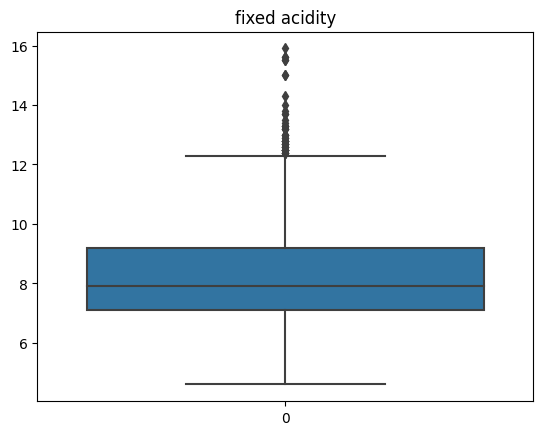

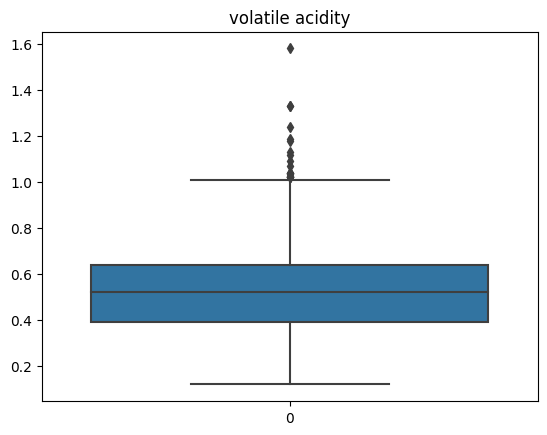

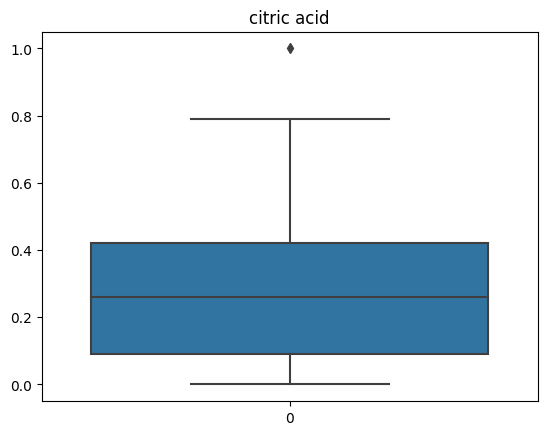

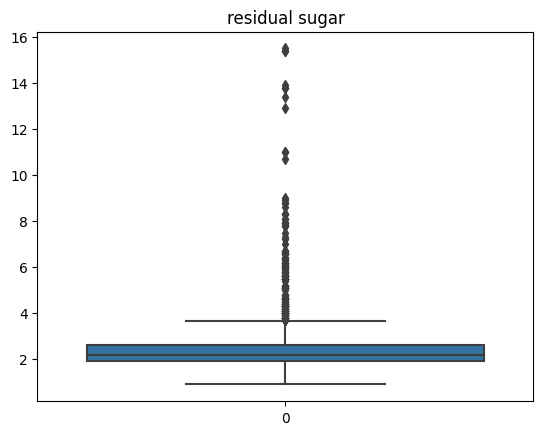

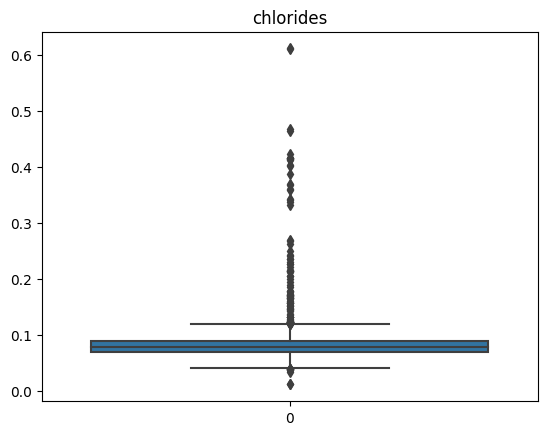

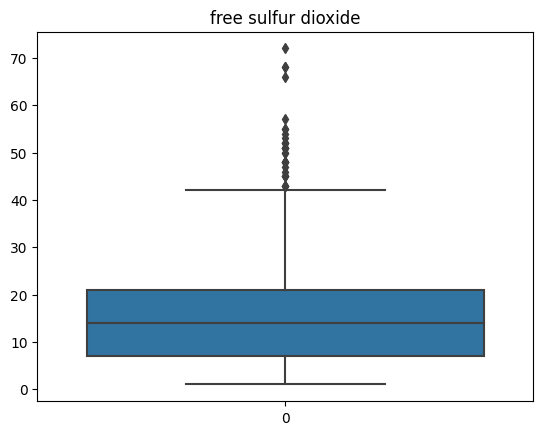

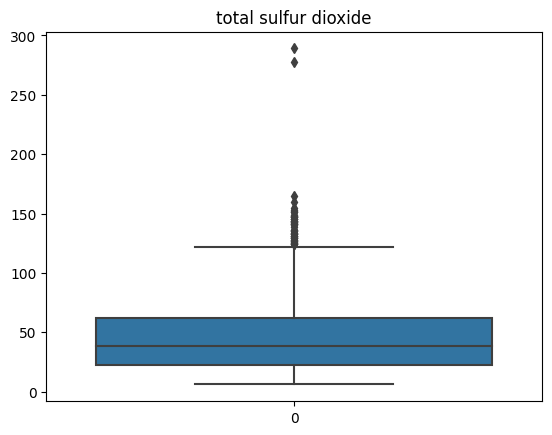

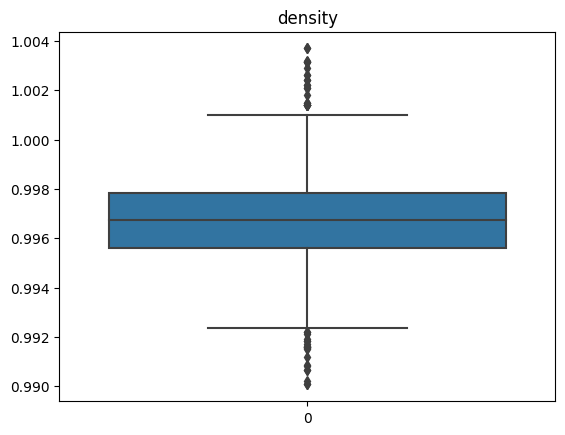

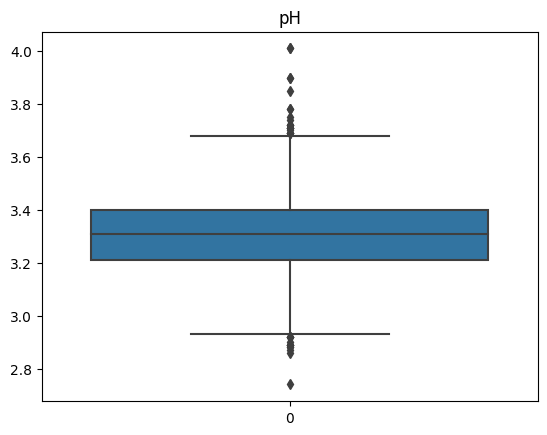

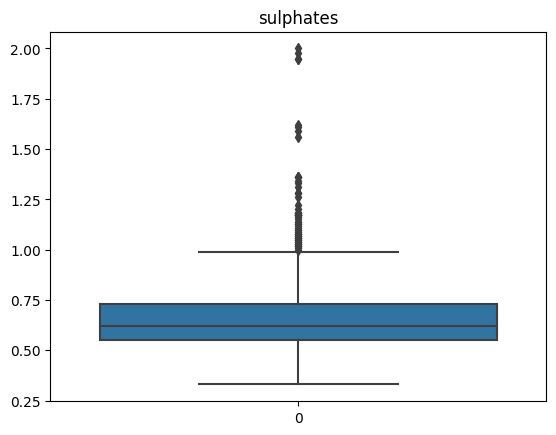

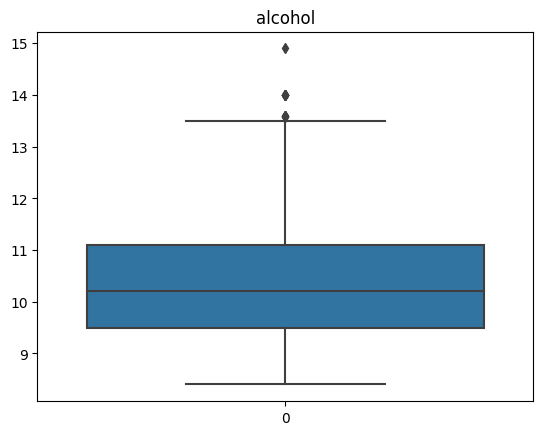

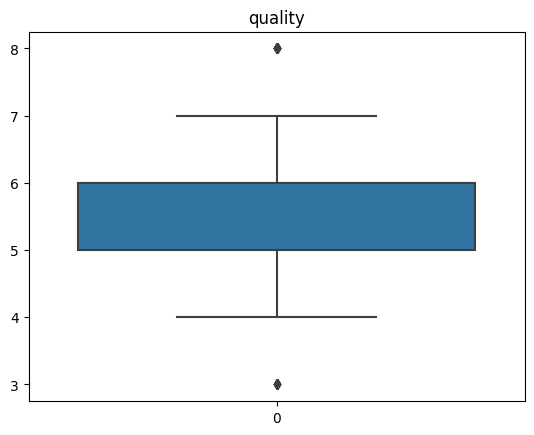

In [53]:
for col in data:
    plt.title(col)
    sns.boxplot(data[col])
    plt.show()

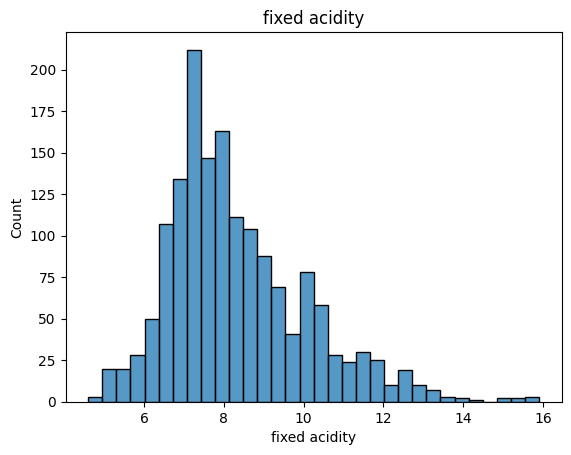

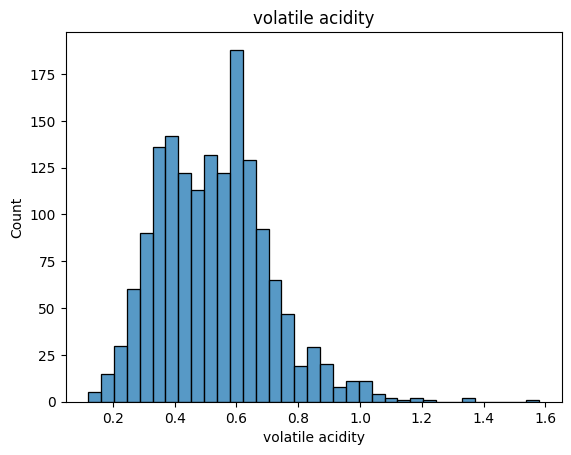

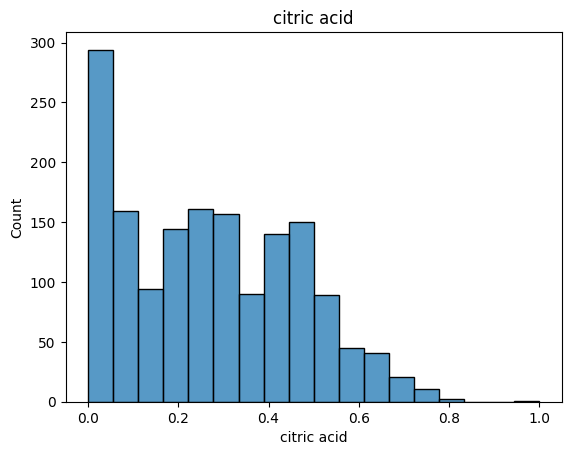

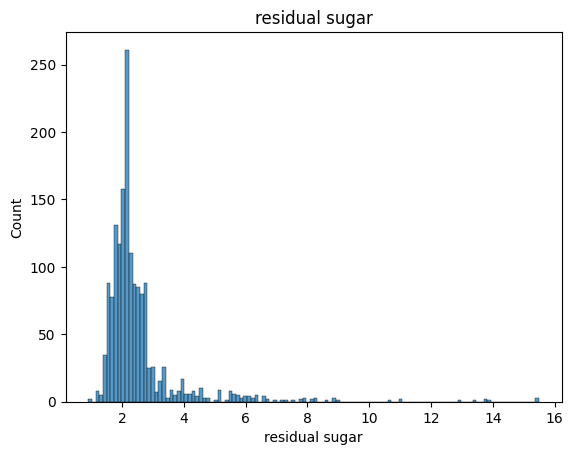

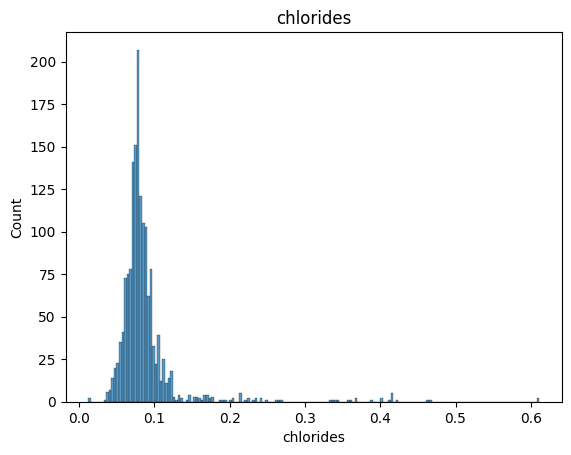

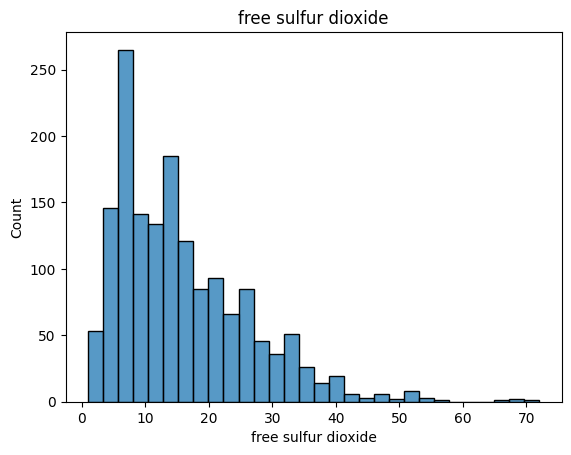

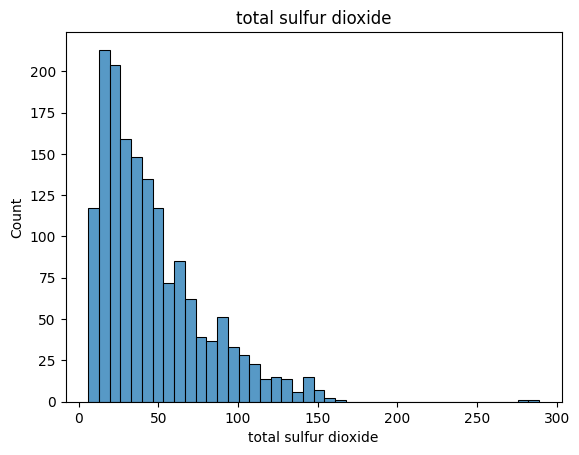

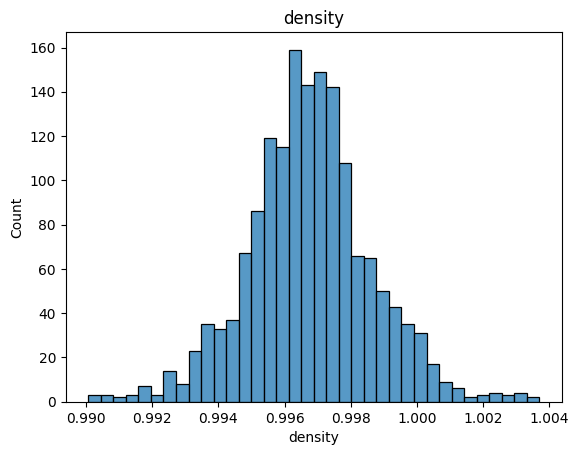

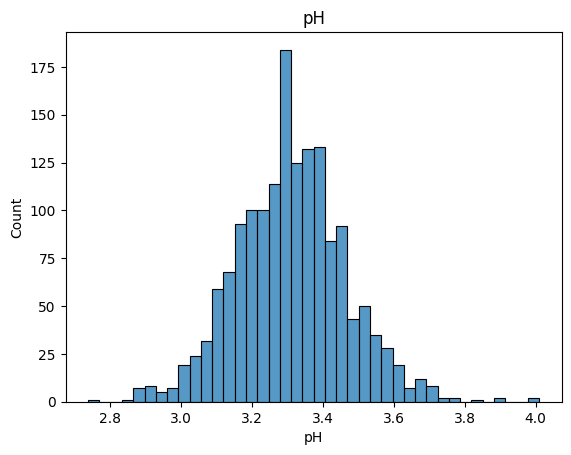

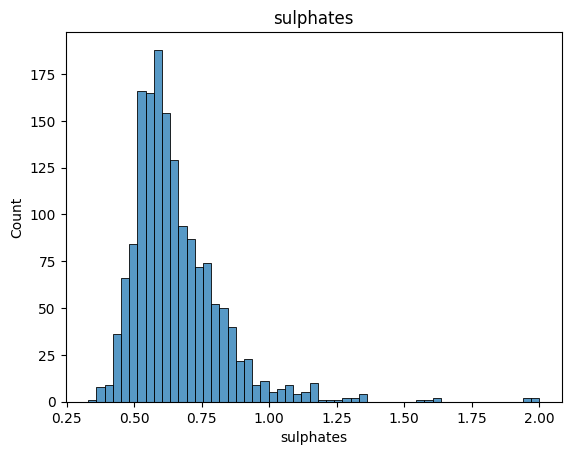

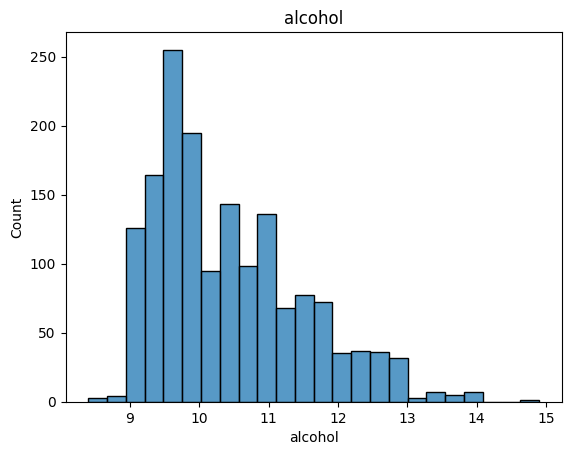

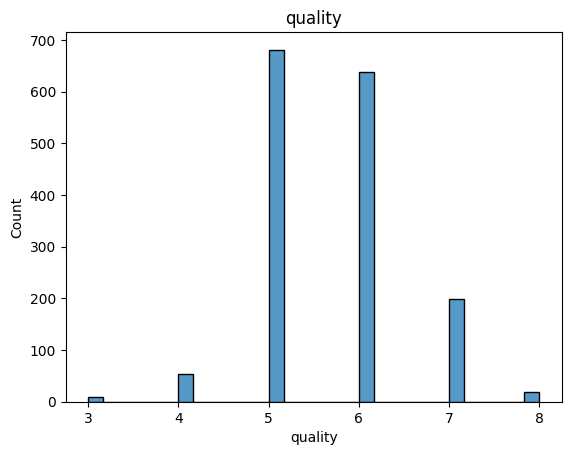

In [54]:
for col in data:
    plt.title(col)
    sns.histplot(data[col])
    plt.show()

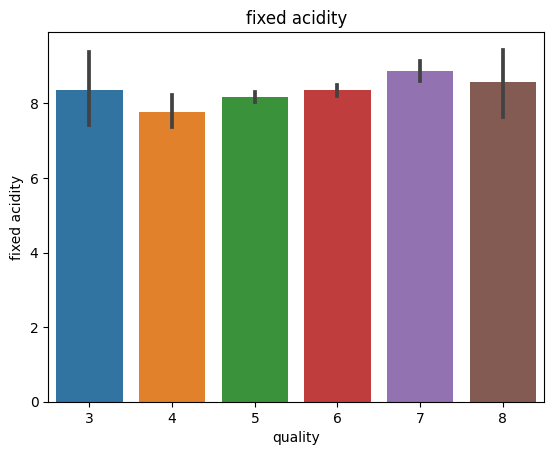

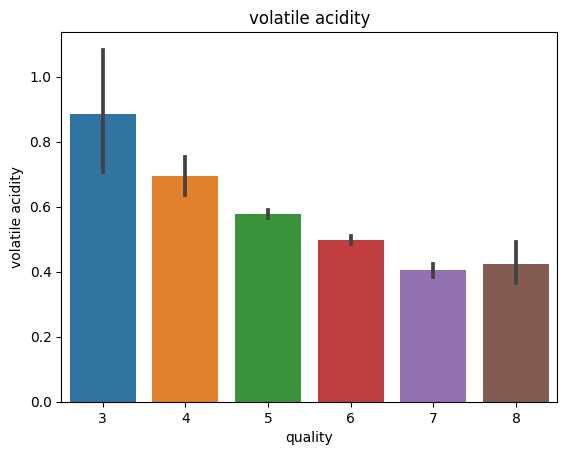

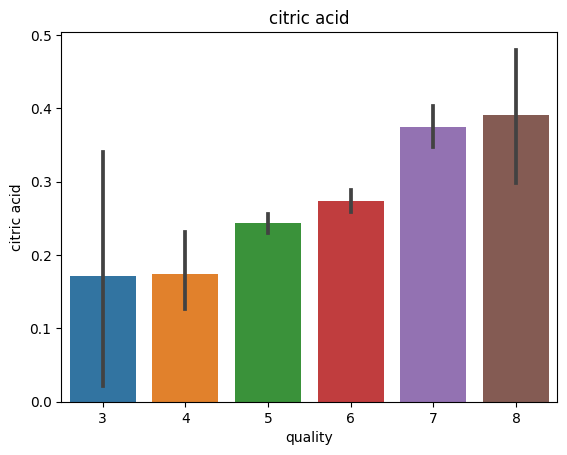

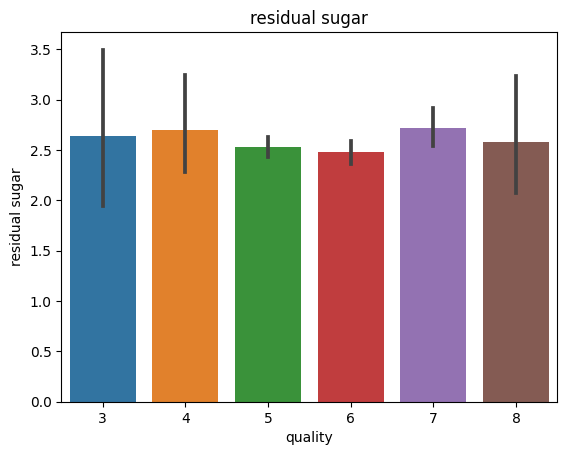

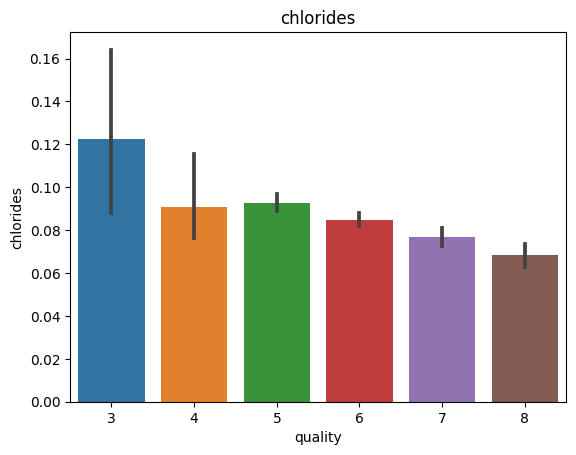

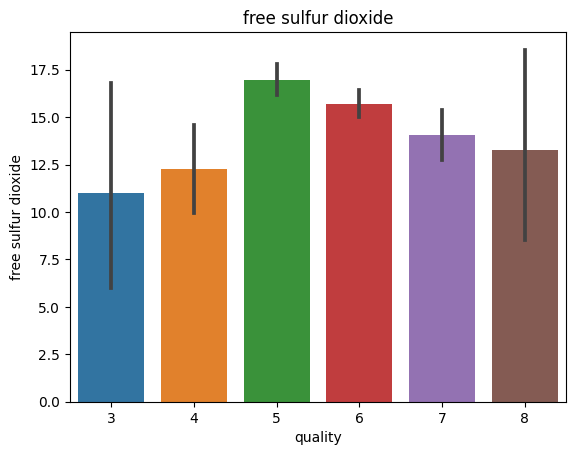

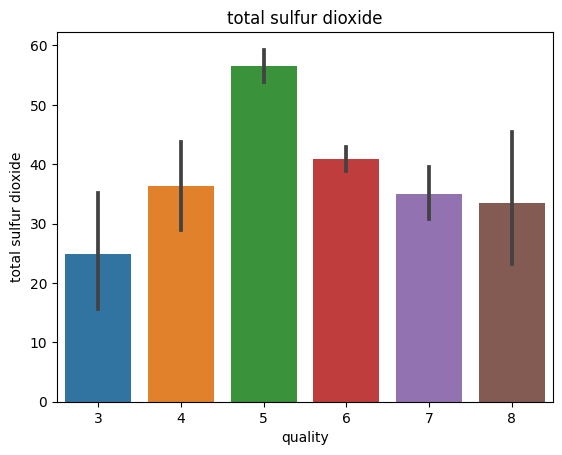

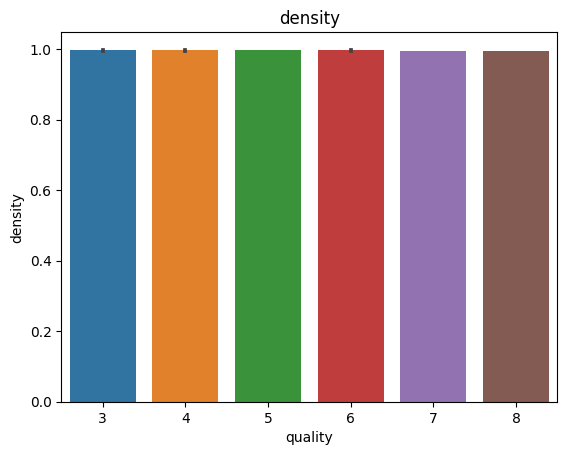

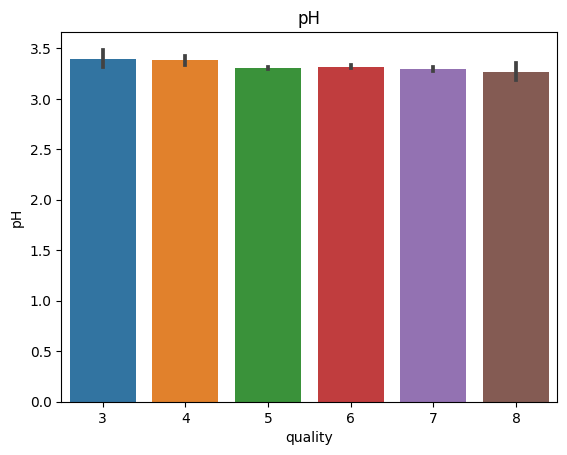

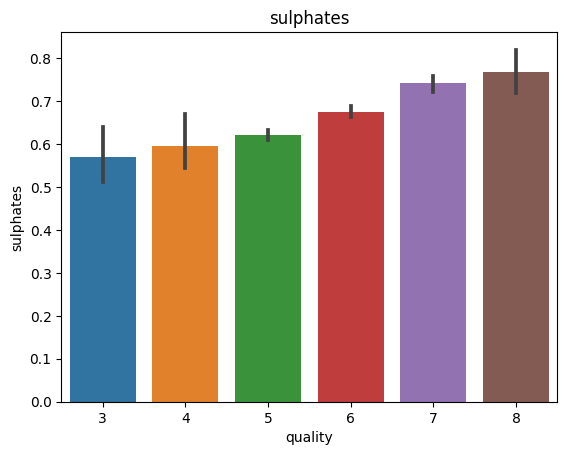

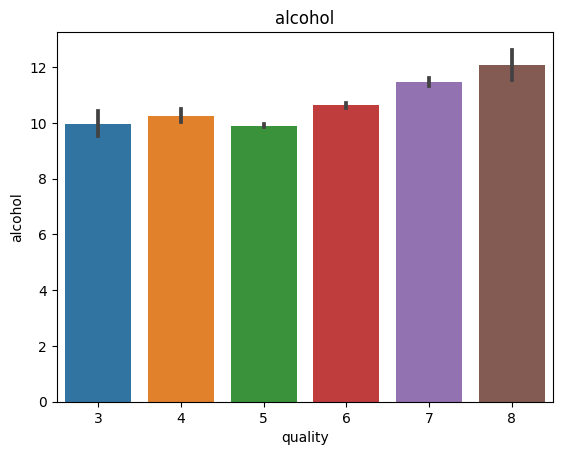

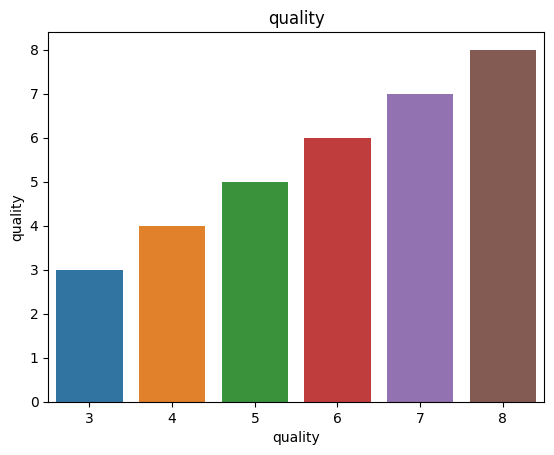

In [55]:
for col in data:
    plt.title(col)
    sns.barplot(x = data['quality'],y =data[col])
    plt.show()

In [56]:
data['quality'] = data['quality'].apply(lambda x : 1 if x>=6.5 else 0)

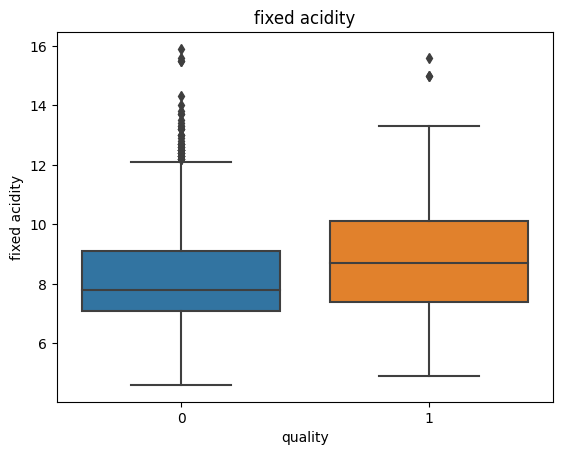

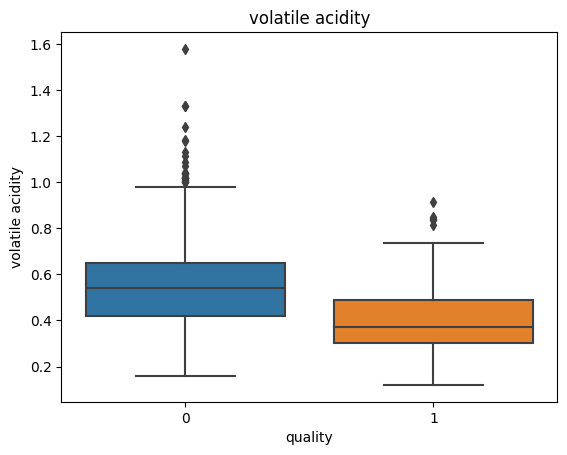

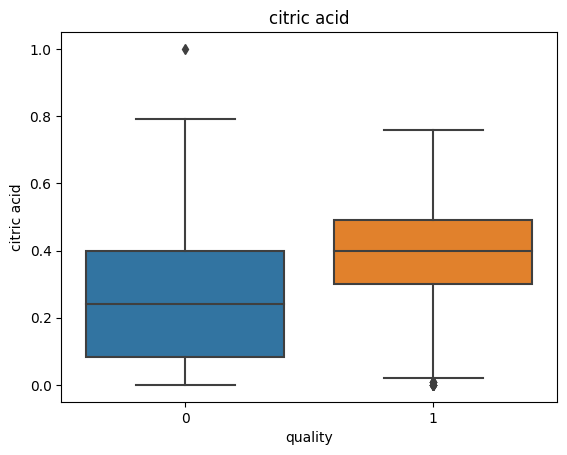

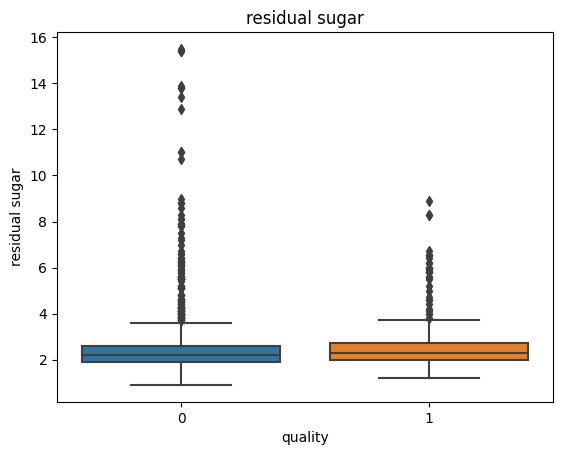

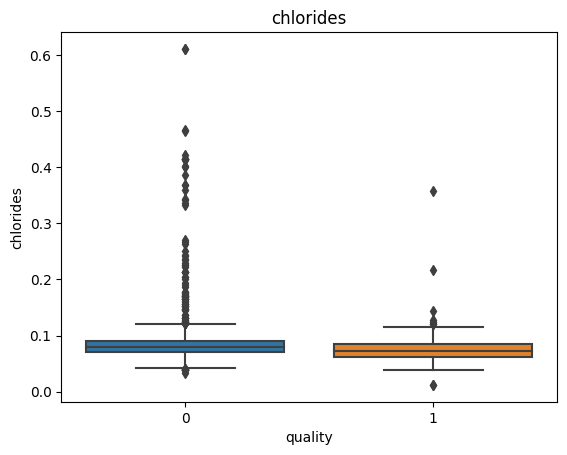

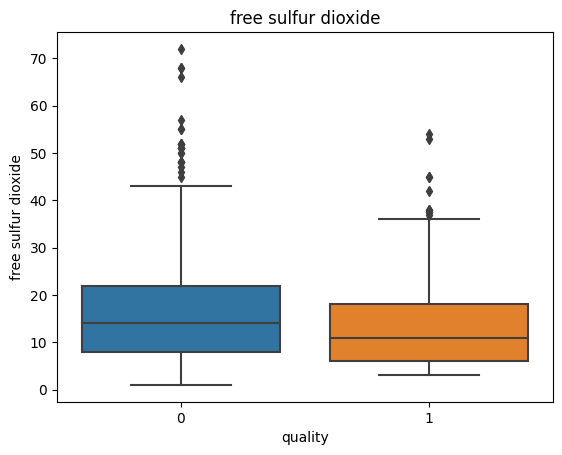

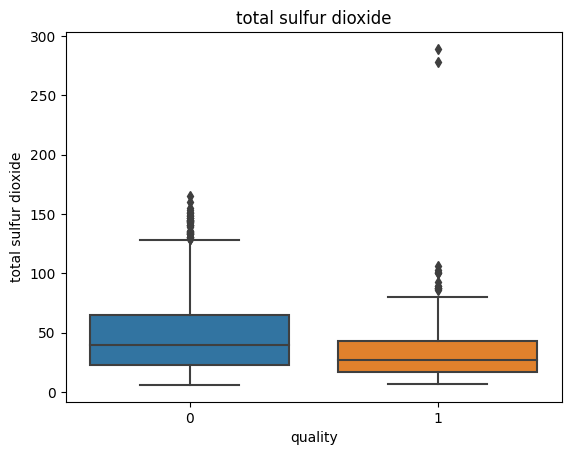

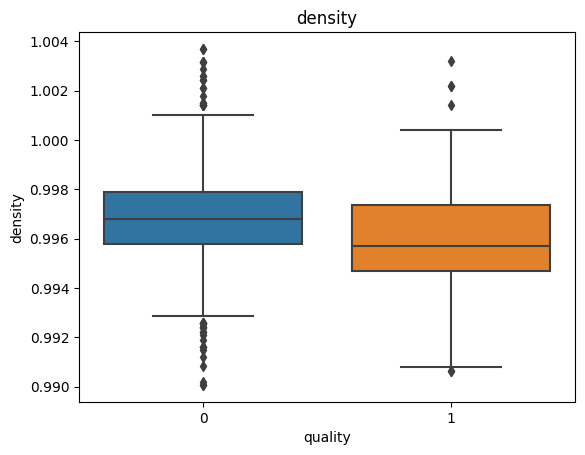

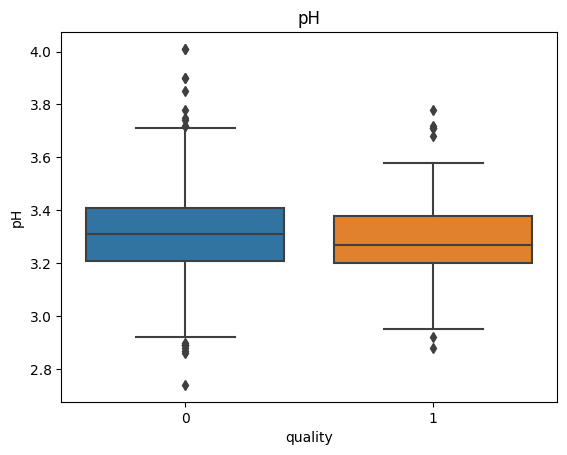

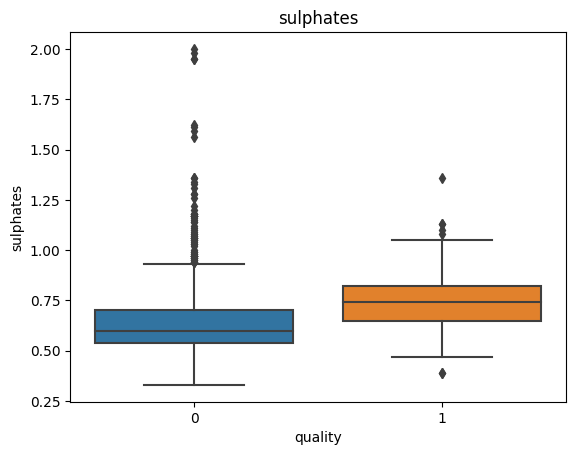

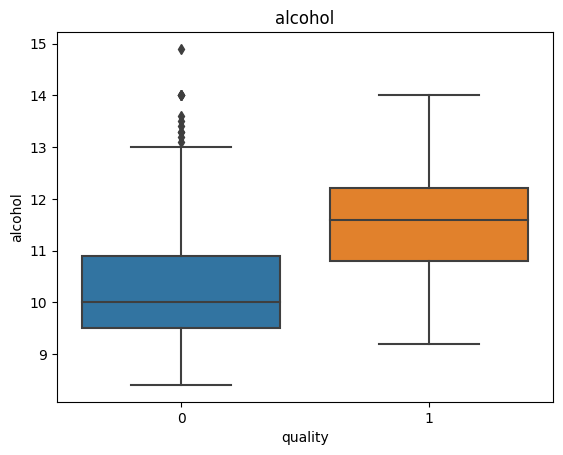

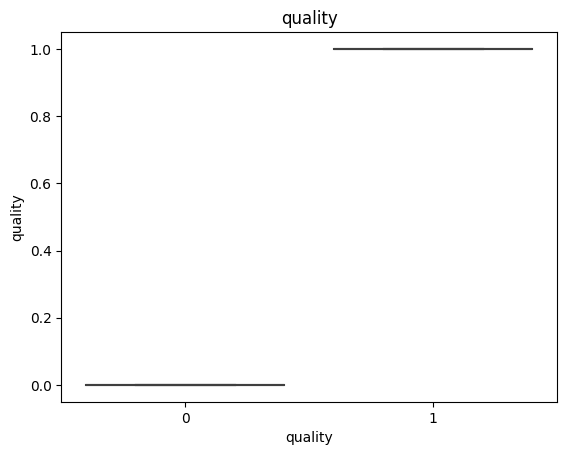

In [57]:
for col in data:
    plt.title(col)
    sns.boxplot(y = data[col], x = data['quality'])
    plt.show()

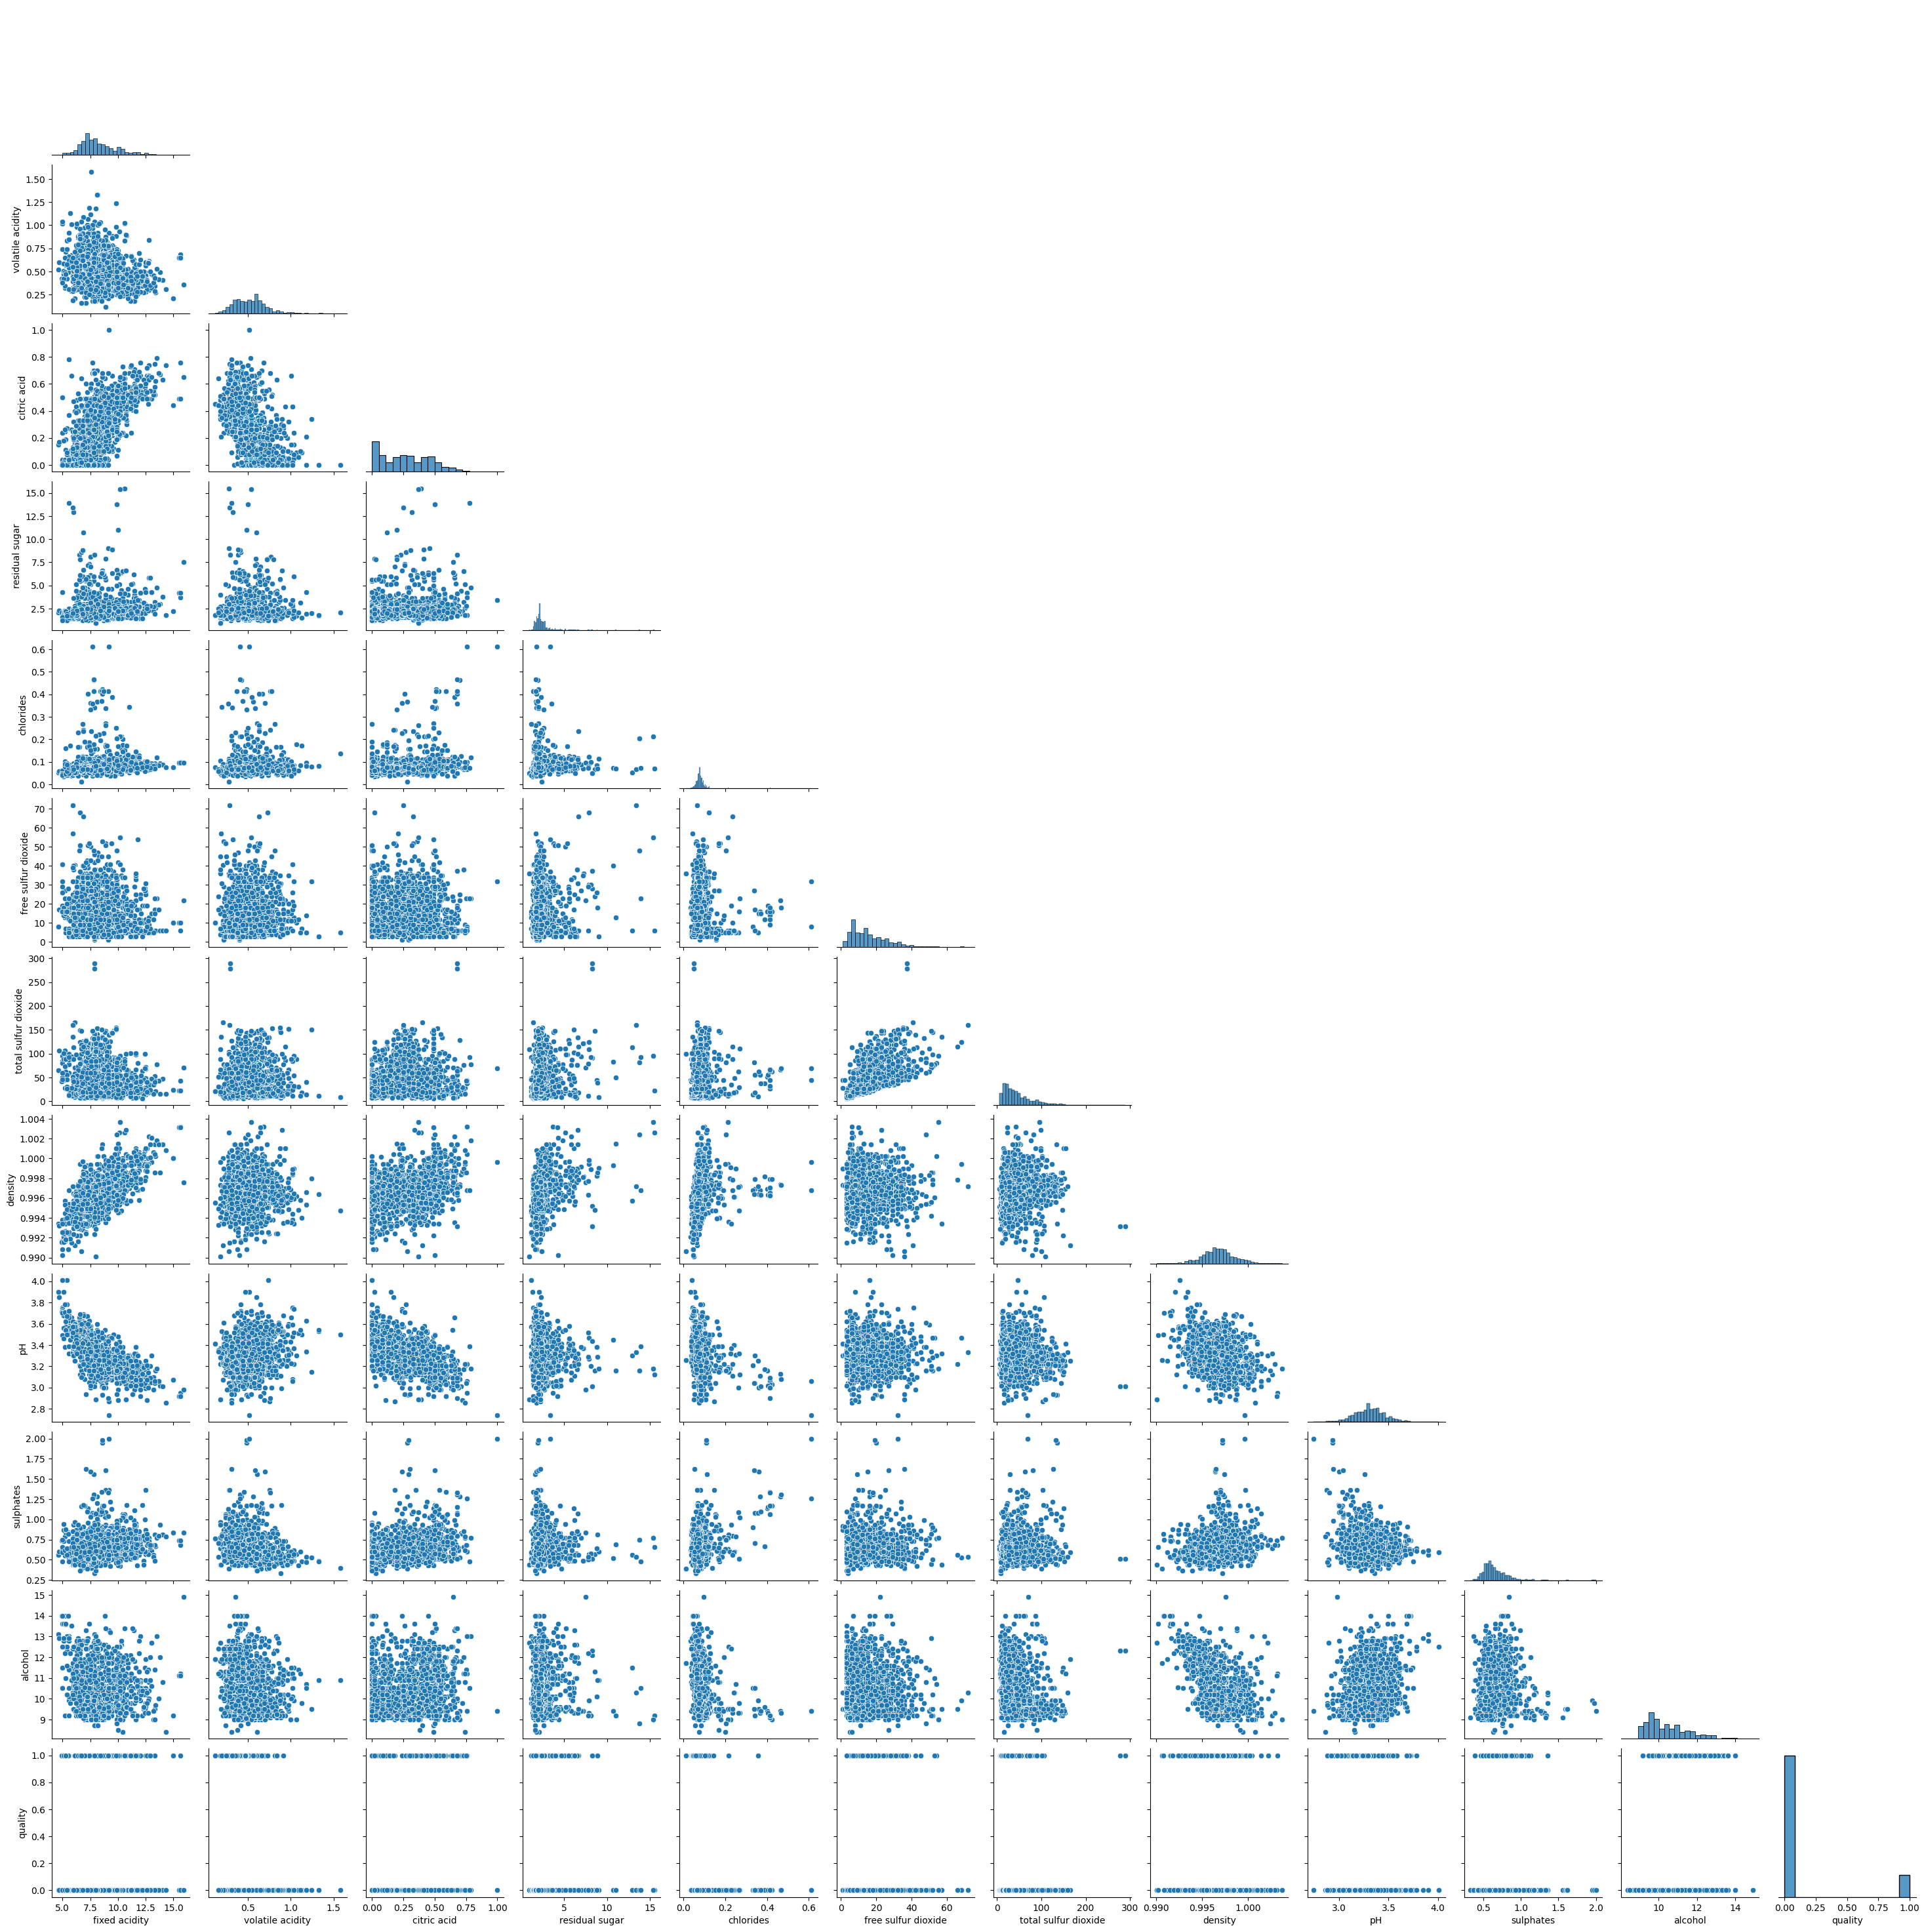

In [58]:
sns.pairplot(data = data, corner = True)

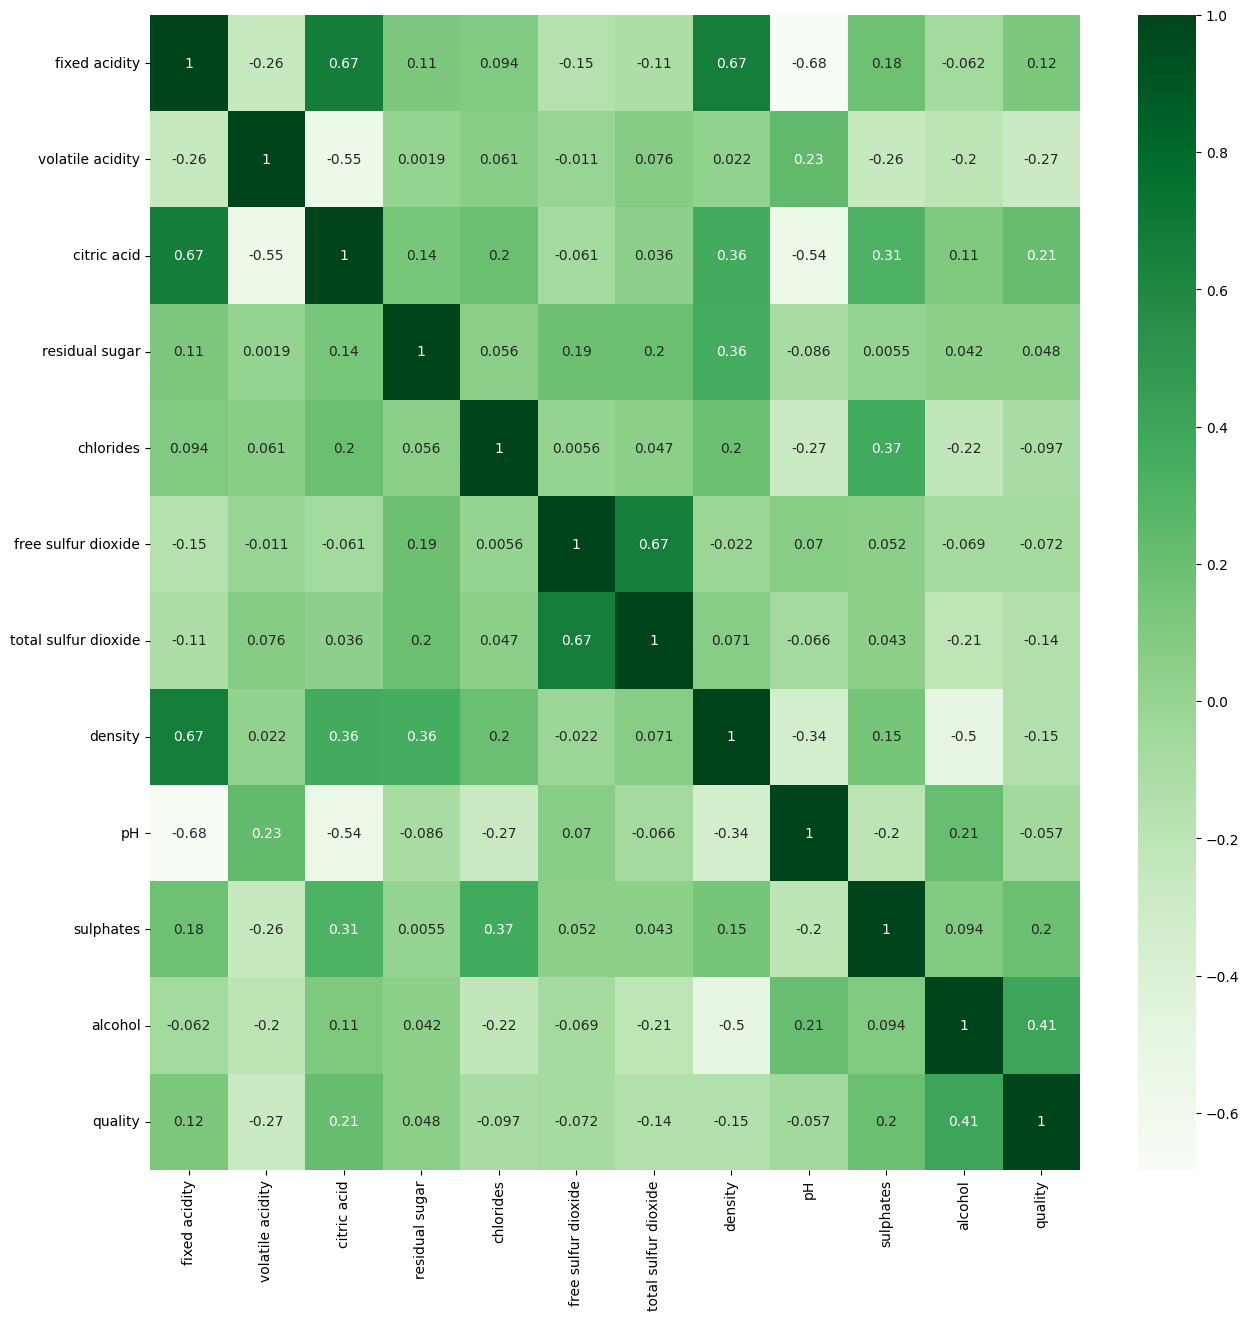

In [59]:
plt.figure(figsize = [15,15])
sns.heatmap(data.corr() , cmap = 'Greens'  , annot = True)
plt.show()

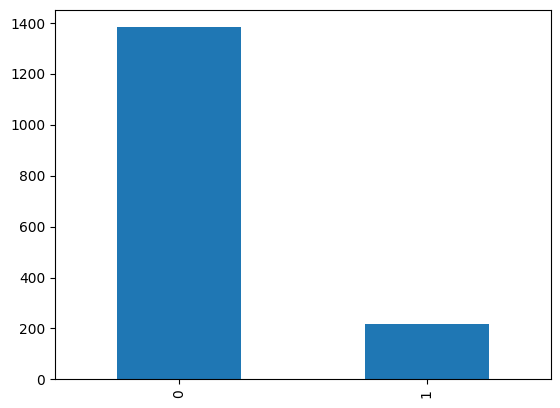

In [60]:
data.quality.value_counts().plot.bar()
plt.show()

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [62]:
X = data.drop('quality', axis = 1)
y = data['quality']

In [63]:
X.shape , y.shape

((1599, 11), (1599,))

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [65]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [66]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [67]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       273
           1       0.78      0.53      0.63        47

    accuracy                           0.91       320
   macro avg       0.85      0.75      0.79       320
weighted avg       0.90      0.91      0.90       320



In [68]:
print(confusion_matrix(y_test, pred_rfc))

[[266   7]
 [ 22  25]]


In [69]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [70]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



In [71]:
print(confusion_matrix(y_test, pred_rfc))

[[266   7]
 [ 22  25]]


In [72]:
# param_grid = { 
#     'n_estimators': [200, 500],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth' : [4,5,6,7,8],
#     'criterion' :['gini', 'entropy']
# }
# grid_svc = GridSearchCV(rfc, param_grid=param_grid, scoring='accuracy' , refit = True, verbose = 3)

In [73]:
# grid_svc.fit(X_train , y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[CV 1/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200;, score=0.875 total time=   0.7s
[CV 2/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200;, score=0.879 total time=   0.5s
[CV 3/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200;, score=0.879 total time=   0.4s
[CV 4/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200;, score=0.898 total time=   0.5s
[CV 5/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200;, score=0.902 total time=   0.4s
[CV 1/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=500;, score=0.871 total time=   1.4s
[CV 2/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=500;, score=0.883 total time=   1.1s
[CV 3/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=500;, score=0.867 total time=   1.1s


KeyboardInterrupt: 

In [ ]:
grid_svc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 500}

In [ ]:
# param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
# grid = GridSearchCV(svc, param_grid, refit = True, verbose = 3)

In [ ]:
# grid.fit(X_train , y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.867 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.867 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.867 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.867 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.867 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.867 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.867 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.867 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.867 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.867 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.867 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
# grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [74]:
rfc2 = RandomForestClassifier(criterion=  'entropy',max_depth= 8,max_features= 'sqrt',n_estimators = 500)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [75]:
print(classification_report(y_test, pred_rfc))


              precision    recall  f1-score   support

           0       0.92      0.97      0.95       273
           1       0.76      0.53      0.62        47

    accuracy                           0.91       320
   macro avg       0.84      0.75      0.79       320
weighted avg       0.90      0.91      0.90       320



In [76]:
print(confusion_matrix(y_test, pred_rfc))


[[265   8]
 [ 22  25]]


In [77]:
y_test

803     0
124     0
350     0
682     0
1326    0
       ..
1259    0
1295    0
1155    0
963     0
704     0
Name: quality, Length: 320, dtype: int64

In [78]:
from sklearn.pipeline import make_pipeline
scaler=StandardScaler()
rf = RandomForestClassifier(criterion=  'entropy',max_depth= 8,max_features= 'sqrt',n_estimators = 500)

pipe= make_pipeline(scaler,rf)
pipe.fit(X_train,y_train)
pred_rfc = rfc.predict(X_test)


In [79]:
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       273
           1       0.76      0.53      0.62        47

    accuracy                           0.91       320
   macro avg       0.84      0.75      0.79       320
weighted avg       0.90      0.91      0.90       320

[[265   8]
 [ 22  25]]


In [80]:
X.shape

(1599, 11)

In [81]:
X_test[3]

array([ 0.10229334, -0.39373328,  0.19209222, -0.21283933, -0.21187069,
        1.5639895 ,  0.34446287,  0.66085053,  0.1191921 , -0.68767023,
       -0.58738978])

In [82]:
def pred(params):
    params = np.array(params).reshape(1,-1)
    ans = pipe.predict(params)
    if ans == 1:
        print('Good quality')
    else:
        print('Bad quality')

In [89]:
pred1((7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5))


Bad quality


In [84]:
import pickle
pickle.dump(pipe,open('model.pkl','wb'))


In [85]:
# ! pip install -U scikit-learn==1.2.2



In [88]:
model= pickle.load(open('model.pkl', 'rb'))
def pred1(params):
    params = np.array(params).reshape(1,-1)
    ans = model.predict(params)
    if ans == 1:
        print('Good quality')
    else:
        print('Bad quality')